In [1]:
import os
from pymongo import MongoClient
from dotenv import load_dotenv

# .env 파일 로드
load_dotenv()

# 환경 변수 읽기
MONGO_URI = os.getenv('MONGO_URI')  # MongoDB URI
MONGO_DB_NAME = os.getenv('MONGO_DB_NAME')  # MongoDB 데이터베이스 이름

# MongoDB 연결
client = MongoClient(MONGO_URI)
db = client[MONGO_DB_NAME]  # 데이터베이스 선택

print(f"데이터베이스 '{MONGO_DB_NAME}'에 연결되었습니다.")

데이터베이스 'auction_price'에 연결되었습니다.


In [2]:
import pandas as pd

# 컬렉션 선택
collection = db['agromarket']  

data = list(collection.find())  # MongoDB 데이터를 리스트로 변환

df = pd.DataFrame(data)

In [3]:
df.head()

,_id,일자,연도,월,일,계절,지역,도매시장,부류,품목,총물량(kg),총금액(원),총단가(원/kg),평균물량(kg),평균금액(원),평균단가(원/kg)
0,6768152c37dfd0c3f82194c0,2019-09-02,2019,9,2,가을,강릉,강릉,과실류,감귤,650.0,2670000.0,4107.69,650.0,2670000.00,4107.69
1,6768152c37dfd0c3f82194c1,2019-09-02,2019,9,2,가을,강릉,강릉,과실류,곶감,48.0,132000.0,2750.00,48.0,132000.00,2750.00
2,6768152c37dfd0c3f82194c2,2019-09-02,2019,9,2,가을,강릉,강릉,과실류,무화과,20.0,90000.0,4500.00,20.0,90000.00,4500.00
3,6768152c37dfd0c3f82194c3,2019-09-02,2019,9,2,가을,강릉,강릉,과실류,바나나,1404.0,2938000.0,2092.59,702.0,1469000.00,2092.59
4,6768152c37dfd0c3f82194c4,2019-09-02,2019,9,2,가을,강릉,강릉,과실류,배,10657.5,34569400.0,3243.67,3552.5,11523133.33,3243.67


In [4]:
df.describe()

,연도,월,일,총물량(kg),총금액(원),총단가(원/kg),평균물량(kg),평균금액(원),평균단가(원/kg)
count,5.643209e+06,5.643209e+06,5.643209e+06,5.643209e+06,5.643209e+06,5.643209e+06,5.643209e+06,5.643209e+06,5.643209e+06
mean,2.021524e+03,6.552971e+00,1.578309e+01,5.862736e+03,1.227140e+07,4.967866e+03,1.301181e+03,2.626121e+06,4.967866e+03
std,1.712992e+00,3.421168e+00,8.737152e+00,3.367184e+04,6.118557e+07,2.021888e+04,5.480042e+03,7.493261e+06,2.021888e+04
min,2.019000e+03,1.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,4.500000e-01,0.000000e+00,2.000000e+00,4.500000e-01
25%,2.020000e+03,4.000000e+00,8.000000e+00,4.650000e+01,1.750000e+05,1.729130e+03,3.000000e+01,1.150250e+05,1.729130e+03
50%,2.022000e+03,7.000000e+00,1.600000e+01,3.300000e+02,1.032000e+06,3.043090e+03,1.627600e+02,5.119000e+05,3.043090e+03
75%,2.023000e+03,1.000000e+01,2.300000e+01,2.195000e+03,5.769700e+06,5.600000e+03,7.860000e+02,2.160000e+06,5.600000e+03
max,2.024000e+03,1.200000e+01,3.100000e+01,2.065254e+07,7.725156e+09,3.000000e+07,4.401350e+06,1.279800e+09,3.000000e+07


In [5]:
# 데이터 내 유효하지 않은 값 확인
print("NaN 값 개수:")
print(df.isna().sum())  # NaN 값 개수 확인

print("\ninf 값 개수:")
print((df == float('inf')).sum())  # inf 값 개수 확인

print("\n-inf 값 개수:")
print((df == float('-inf')).sum())  # -inf 값 개수 확인


NaN 값 개수:
_id           0
일자            0
연도            0
월             0
일             0
계절            0
지역            0
도매시장          0
부류            0
품목            0
총물량(kg)       0
총금액(원)        0
총단가(원/kg)     0
평균물량(kg)      0
평균금액(원)       0
평균단가(원/kg)    0
dtype: int64

inf 값 개수:
_id           0
일자            0
연도            0
월             0
일             0
계절            0
지역            0
도매시장          0
부류            0
품목            0
총물량(kg)       0
총금액(원)        0
총단가(원/kg)     0
평균물량(kg)      0
평균금액(원)       0
평균단가(원/kg)    0
dtype: int64

-inf 값 개수:
_id           0
일자            0
연도            0
월             0
일             0
계절            0
지역            0
도매시장          0
부류            0
품목            0
총물량(kg)       0
총금액(원)        0
총단가(원/kg)     0
평균물량(kg)      0
평균금액(원)       0
평균단가(원/kg)    0
dtype: int64


In [6]:
# 총물량(kg)이 0인 행 확인
print(df[df['총물량(kg)'] == 0])

# 평균물량(kg)이 0인 행 확인
print(df[df['평균물량(kg)'] == 0])


                              _id          일자    연도  월   일  계절  지역  도매시장  \
2872332  6768154a37dfd0c3f84d68cc  2022-09-07  2022  9   7  가을  수원    수원   
3115580  6768154c37dfd0c3f8511efc  2022-03-25  2022  3  25   봄  수원    수원   
3116846  6768154c37dfd0c3f85123ee  2022-04-11  2022  4  11   봄  수원    수원   
4328341  6768155937dfd0c3f863a055  2023-07-14  2023  7  14  여름  순천    순천   
4426396  6768155a37dfd0c3f8651f5c  2023-06-23  2023  6  23  여름  창원  창원팔용   
5050936  6768155f37dfd0c3f86ea6f8  2024-05-29  2024  5  29   봄  수원    수원   

            부류         품목  총물량(kg)   총금액(원)  총단가(원/kg)  평균물량(kg)  평균금액(원)  \
2872332   엽경채류        메밀순      0.0  12500.0  3125000.0       0.0  12500.0   
3115580    과실류         레몬      0.0  15940.0  7970000.0       0.0  15940.0   
3116846    양채류  파세리(향미나리)      0.0   5210.0  5210000.0       0.0   5210.0   
4328341  조미채소류         방아      0.0   6000.0  3000000.0       0.0   6000.0   
4426396    산채류         솔잎      0.0    640.0   640000.0       0.0    640.0   
50509

In [7]:
# 연도 데이터 확인
print("연도 데이터 분포:")
print(df['연도'].value_counts())  # 연도별 데이터 개수 확인
print("고유 연도:", df['연도'].unique())  # 고유 연도 확인

# 지역 데이터 확인
print("\n지역 데이터 분포:")
print(df['지역'].value_counts())  # 지역별 데이터 개수 확인
print("고유 지역:", df['지역'].unique())  # 고유 지역 확인

# 품목 데이터 확인
print("\n품목 데이터 분포:")
print(df['품목'].value_counts())  # 품목별 데이터 개수 확인
print("고유 품목:", df['품목'].unique())  # 고유 품목 확인


연도 데이터 분포:
연도
2023    993116
2024    945302
2019    940241
2022    938833
2020    925968
2021    899749
Name: count, dtype: int64
고유 연도: [2019 2020 2021 2022 2023 2024]

지역 데이터 분포:
지역
대전    499459
인천    474437
부산    402230
광주    396150
서울    378370
창원    339885
안양    230753
구리    212128
청주    201367
울산    193513
안산    190891
대구    184019
전주    182764
천안    168326
수원    166667
충주    162961
춘천    156846
강릉    150081
익산    149344
원주    146660
진주    139248
정읍    132434
순천    130596
포항    124660
구미     86718
안동     42702
Name: count, dtype: int64
고유 지역: ['강릉' '광주' '구리' '구미' '대구' '대전' '부산' '서울' '수원' '순천' '안동' '안산' '안양' '울산'
 '원주' '익산' '인천' '전주' '정읍' '진주' '창원' '천안' '청주' '춘천' '충주' '포항']

품목 데이터 분포:
품목
기타        113382
상추         56187
호박         56170
방울토마토      55938
오이         55775
           ...  
팍치라오           1
육가공품           1
아보케이트          1
횟대             1
곰반누리나물         1
Name: count, Length: 533, dtype: int64
고유 품목: ['감귤' '곶감' '무화과' '바나나' '배' '복숭아' '사과' '아보카도' '자두' '자몽' '참다래(키위)'

In [9]:
# 필요없는 컬럼 제거 및 결측치 처리
df = df.drop(columns=['_id'])  # MongoDB의 기본 _id 컬럼 제거
df = df.dropna()


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5643209 entries, 0 to 5643208
Data columns (total 15 columns):
 #   Column      Dtype  
---  ------      -----  
 0   일자          object 
 1   연도          int64  
 2   월           int64  
 3   일           int64  
 4   계절          object 
 5   지역          object 
 6   도매시장        object 
 7   부류          object 
 8   품목          object 
 9   총물량(kg)     float64
 10  총금액(원)      float64
 11  총단가(원/kg)   float64
 12  평균물량(kg)    float64
 13  평균금액(원)     float64
 14  평균단가(원/kg)  float64
dtypes: float64(6), int64(3), object(6)
memory usage: 645.8+ MB
None


In [15]:
import matplotlib.pyplot as plt

In [17]:
# 한글 폰트 설정 

import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')  
plt.rcParams['axes.unicode_minus'] = False # 음수값

연도별 데이터 분포:
연도
2019    940241
2020    925968
2021    899749
2022    938833
2023    993116
2024    945302
Name: count, dtype: int64


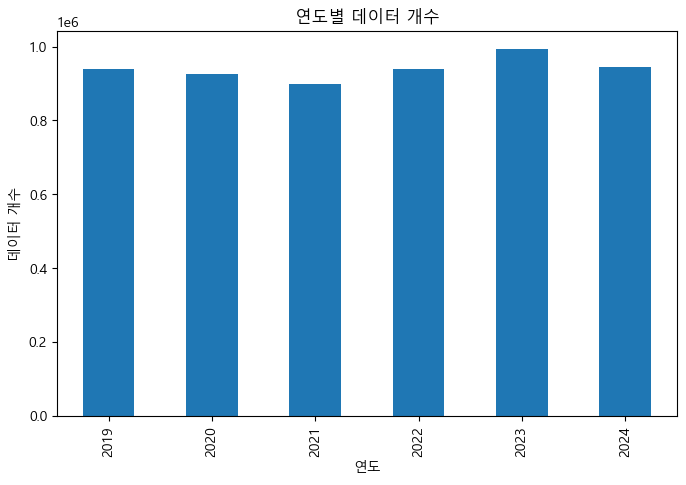

In [18]:
# 연도별 데이터 개수 확인
print("연도별 데이터 분포:")
print(df['연도'].value_counts().sort_index())

# 연도별 데이터 시각화
df['연도'].value_counts().sort_index().plot(kind='bar', figsize=(8, 5), title='연도별 데이터 개수')
plt.xlabel('연도')
plt.ylabel('데이터 개수')
plt.show()



지역별 데이터 분포:
지역
대전    499459
인천    474437
부산    402230
광주    396150
서울    378370
창원    339885
안양    230753
구리    212128
청주    201367
울산    193513
안산    190891
대구    184019
전주    182764
천안    168326
수원    166667
충주    162961
춘천    156846
강릉    150081
익산    149344
원주    146660
진주    139248
정읍    132434
순천    130596
포항    124660
구미     86718
안동     42702
Name: count, dtype: int64


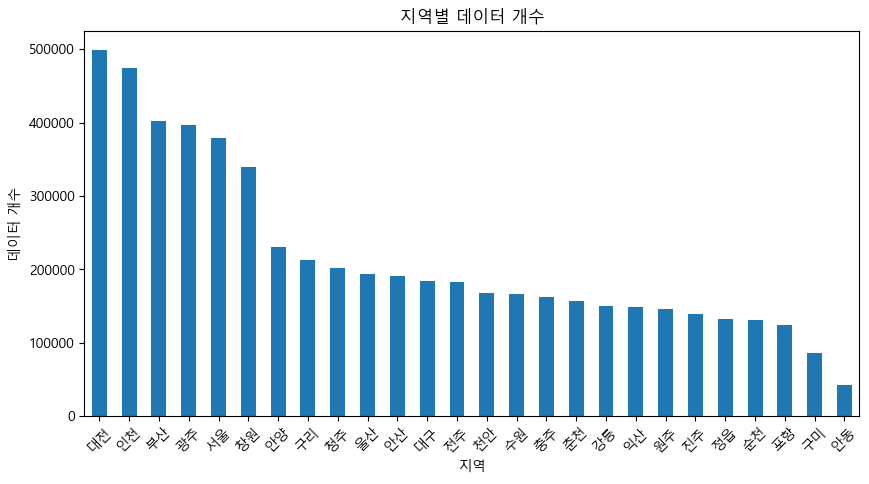

In [19]:
# 지역별 데이터 개수 확인
print("\n지역별 데이터 분포:")
print(df['지역'].value_counts())

# 지역별 데이터 시각화
df['지역'].value_counts().plot(kind='bar', figsize=(10, 5), title='지역별 데이터 개수')
plt.xlabel('지역')
plt.ylabel('데이터 개수')
plt.xticks(rotation=45)
plt.show()



품목별 데이터 분포:
품목
기타        113382
상추         56187
호박         56170
방울토마토      55938
오이         55775
           ...  
팍치라오           1
육가공품           1
아보케이트          1
횟대             1
곰반누리나물         1
Name: count, Length: 533, dtype: int64

상위 20개 품목별 데이터 분포:
품목
기타              113382
상추               56187
호박               56170
방울토마토            55938
오이               55775
대파               55618
사과               55599
토마토              55361
바나나              55298
풋고추              55101
포도               54997
부추               54991
감자               54934
양파               54520
배추               54464
깻잎               54463
시금치              54341
얼갈이배추            54217
느타리버섯            54158
마늘               54063
고구마              53923
무                53920
표고버섯             53775
쪽파               53609
가지               53512
브로코리(녹색꽃양배추)     52985
열무               52972
새송이              52842
양배추              52774
꽈리고추             52595
Name: count, dtype: int64


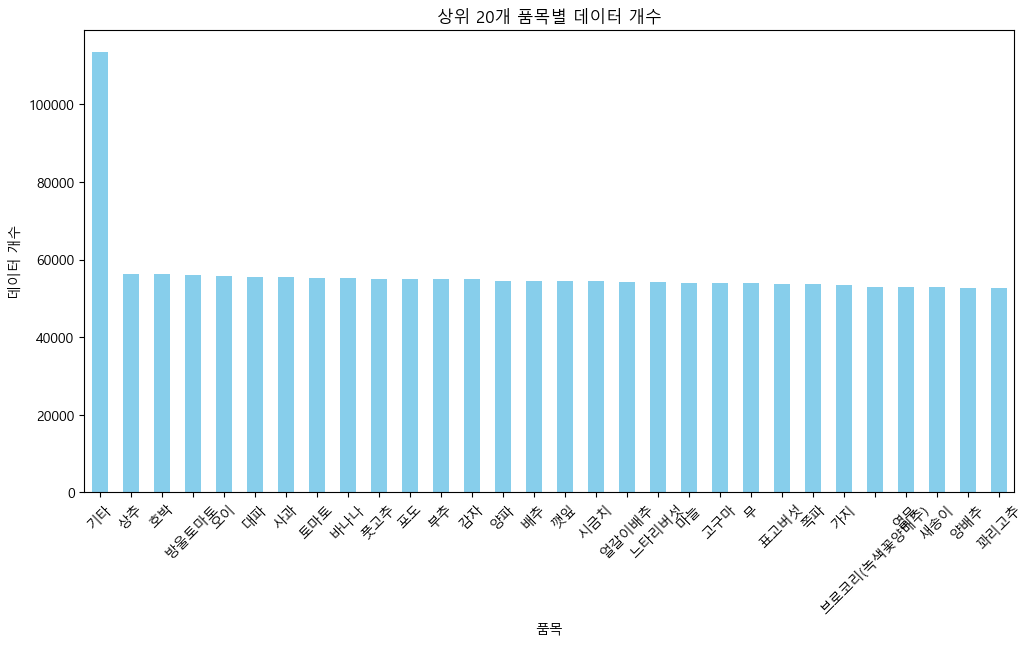

In [22]:
# 품목별 데이터 개수 확인
print("\n품목별 데이터 분포:")
print(df['품목'].value_counts())

# 상위 30개 품목 선택
top_n = 30  # 상위 30개 품목
top_items = df['품목'].value_counts().head(top_n)

# 상위 품목 데이터 출력
print("\n상위 30개 품목별 데이터 분포:")
print(top_items)

# 상위 품목 시각화
top_items.plot(kind='bar', figsize=(12, 6), color='skyblue', title='상위 30개 품목별 데이터 개수')
plt.xlabel('품목')
plt.ylabel('데이터 개수')
plt.title('상위 30개 품목별 데이터 개수')
plt.xticks(rotation=45)
plt.show()


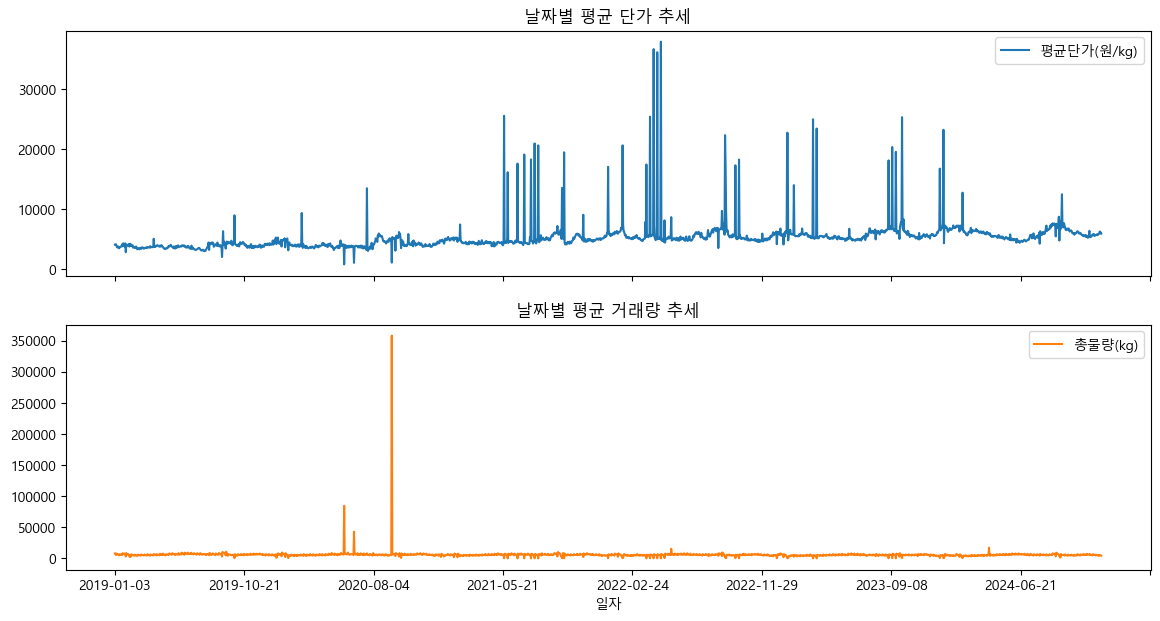

In [25]:
# 날짜별 평균 가격 및 거래량 계산
daily_data = df.groupby('일자')[['평균단가(원/kg)', '총물량(kg)']].mean()

# 시각화
daily_data.plot(figsize=(14, 7), subplots=True, title=['날짜별 평균 단가 추세', '날짜별 평균 거래량 추세'])
plt.show()


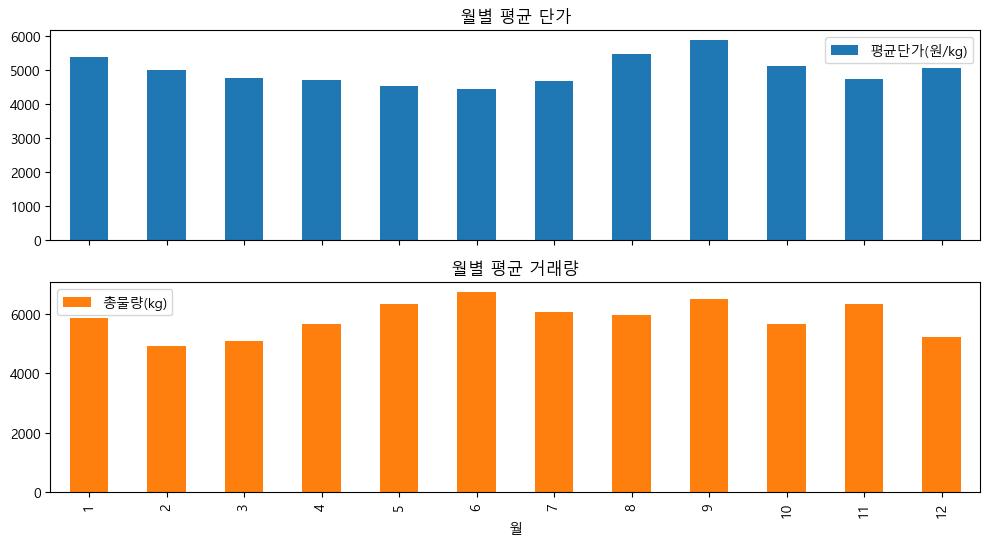

In [26]:
# 월별 평균 단가 및 거래량 계산
monthly_data = df.groupby('월')[['평균단가(원/kg)', '총물량(kg)']].mean()

# 시각화
monthly_data.plot(kind='bar', figsize=(12, 6), title=['월별 평균 단가', '월별 평균 거래량'], subplots=True)
plt.xlabel('월')
plt.show()


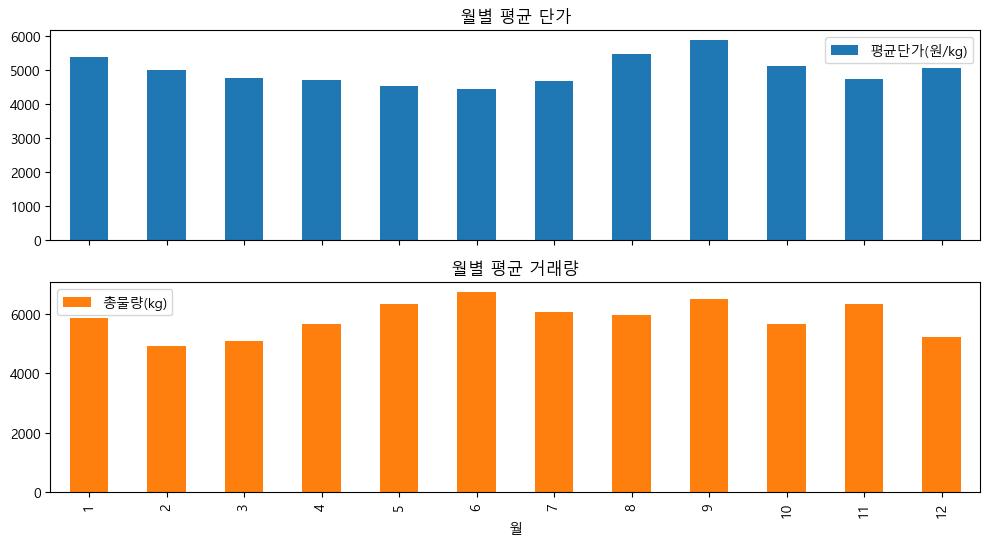

In [27]:
# 월별 평균 단가 및 거래량 계산
monthly_data = df.groupby('월')[['평균단가(원/kg)', '총물량(kg)']].mean()

# 시각화
monthly_data.plot(kind='bar', figsize=(12, 6), title=['월별 평균 단가', '월별 평균 거래량'], subplots=True)
plt.xlabel('월')
plt.show()


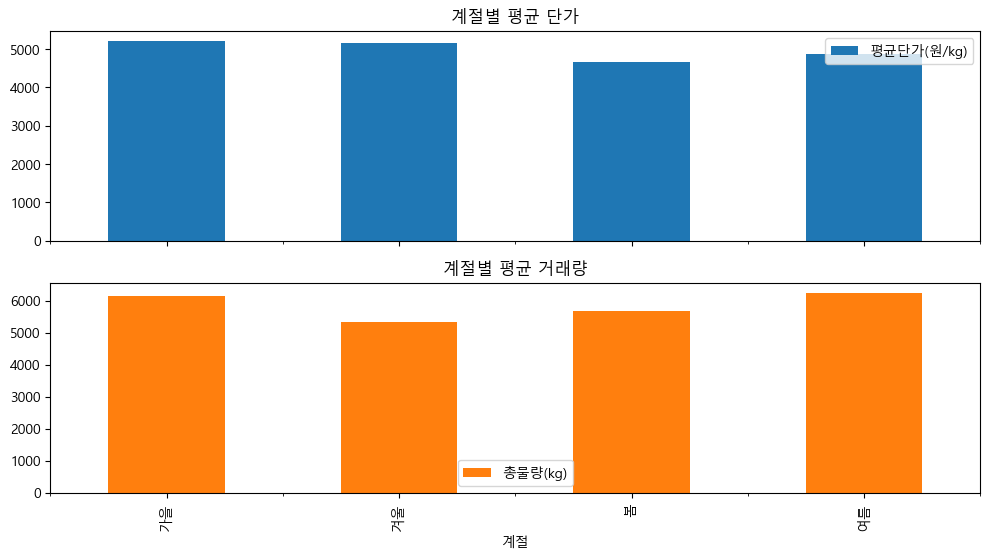

In [28]:
# 계절별 평균 단가 및 거래량 계산
seasonal_data = df.groupby('계절')[['평균단가(원/kg)', '총물량(kg)']].mean()

# 시각화
seasonal_data.plot(kind='bar', figsize=(12, 6), title=['계절별 평균 단가', '계절별 평균 거래량'], subplots=True)
plt.xlabel('계절')
plt.show()


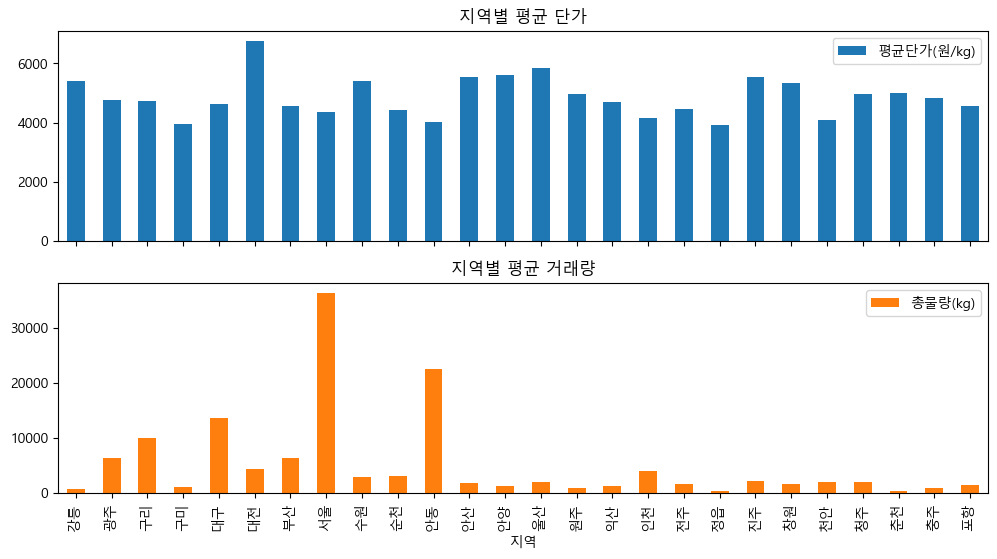

In [29]:
# 지역별 평균 단가 및 거래량 계산
region_data = df.groupby('지역')[['평균단가(원/kg)', '총물량(kg)']].mean()

# 시각화
region_data.plot(kind='bar', figsize=(12, 6), subplots=True, title=['지역별 평균 단가', '지역별 평균 거래량'])
plt.xlabel('지역')
plt.show()


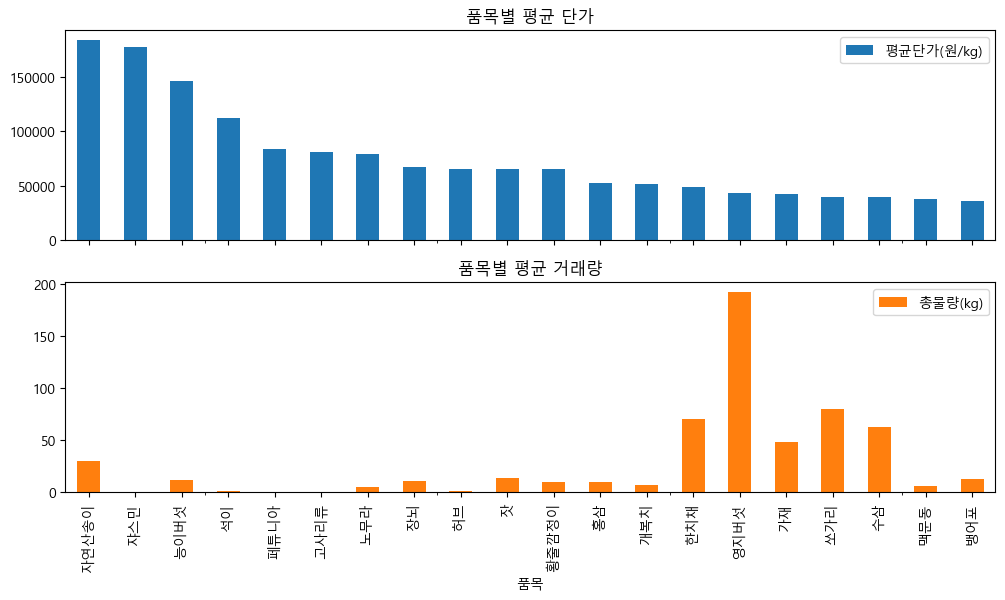

In [31]:
# 품목별 평균 단가 및 거래량 계산
item_data = df.groupby('품목')[['평균단가(원/kg)', '총물량(kg)']].mean().sort_values(by='평균단가(원/kg)', ascending=False)

# 상위 20개 품목만 시각화
top_item_data = item_data.head(20)
top_item_data.plot(kind='bar', figsize=(12, 6), subplots=True, title=['품목별 평균 단가', '품목별 평균 거래량'])
plt.xlabel('품목')
plt.show()


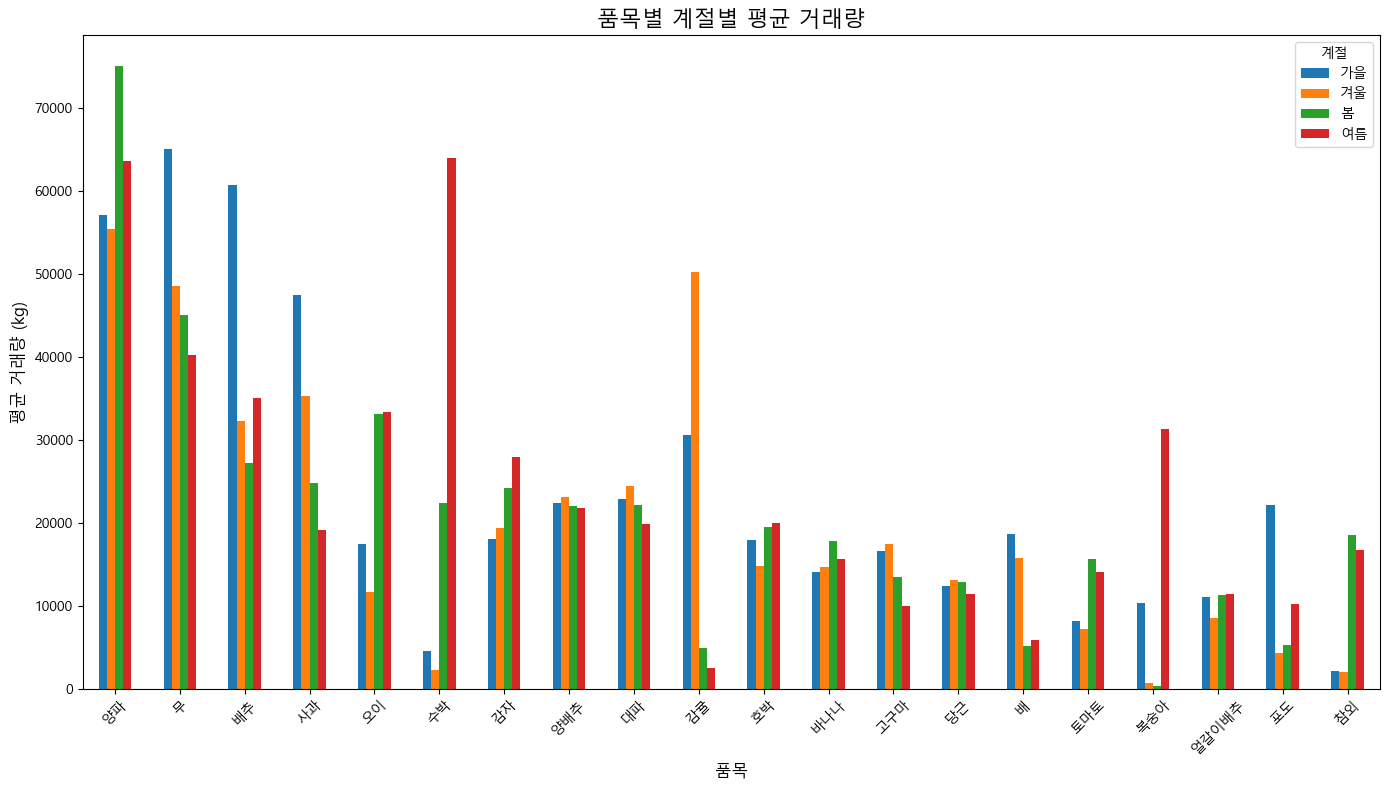

In [ ]:
# 계절별 품목 평균 거래량

# 상위 품목 추출
top_items = seasonal_item_data.groupby('품목')['총물량(kg)'].mean().sort_values(ascending=False).head(20).index

# 상위 품목의 계절별 데이터 필터링
filtered_data = seasonal_item_data.loc[(slice(None), top_items), '총물량(kg)'].unstack(level=0)

# 그래프 시각화
filtered_data.plot(kind='bar', figsize=(14, 8))

# 그래프 설정
plt.title('품목별 계절별 평균 거래량', fontsize=16)
plt.ylabel('평균 거래량 (kg)', fontsize=12)
plt.xlabel('품목', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='계절', fontsize=10)
plt.tight_layout()
plt.show()


             총물량(kg)  평균단가(원/kg)
총물량(kg)     1.000000   -0.024756
평균단가(원/kg) -0.024756    1.000000


<Axes: title={'center': '거래량 vs 단가'}, xlabel='총물량(kg)', ylabel='평균단가(원/kg)'>

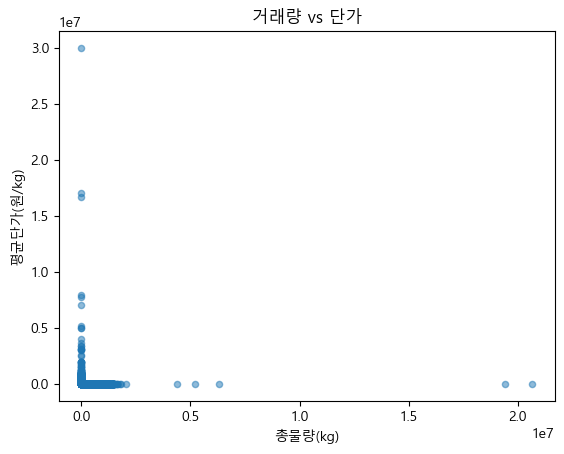

In [38]:
# 상관계수 계산
correlation = df[['총물량(kg)', '평균단가(원/kg)']].corr()
print(correlation)

# 산점도 시각화
df.plot(kind='scatter', x='총물량(kg)', y='평균단가(원/kg)', alpha=0.5, title='거래량 vs 단가')


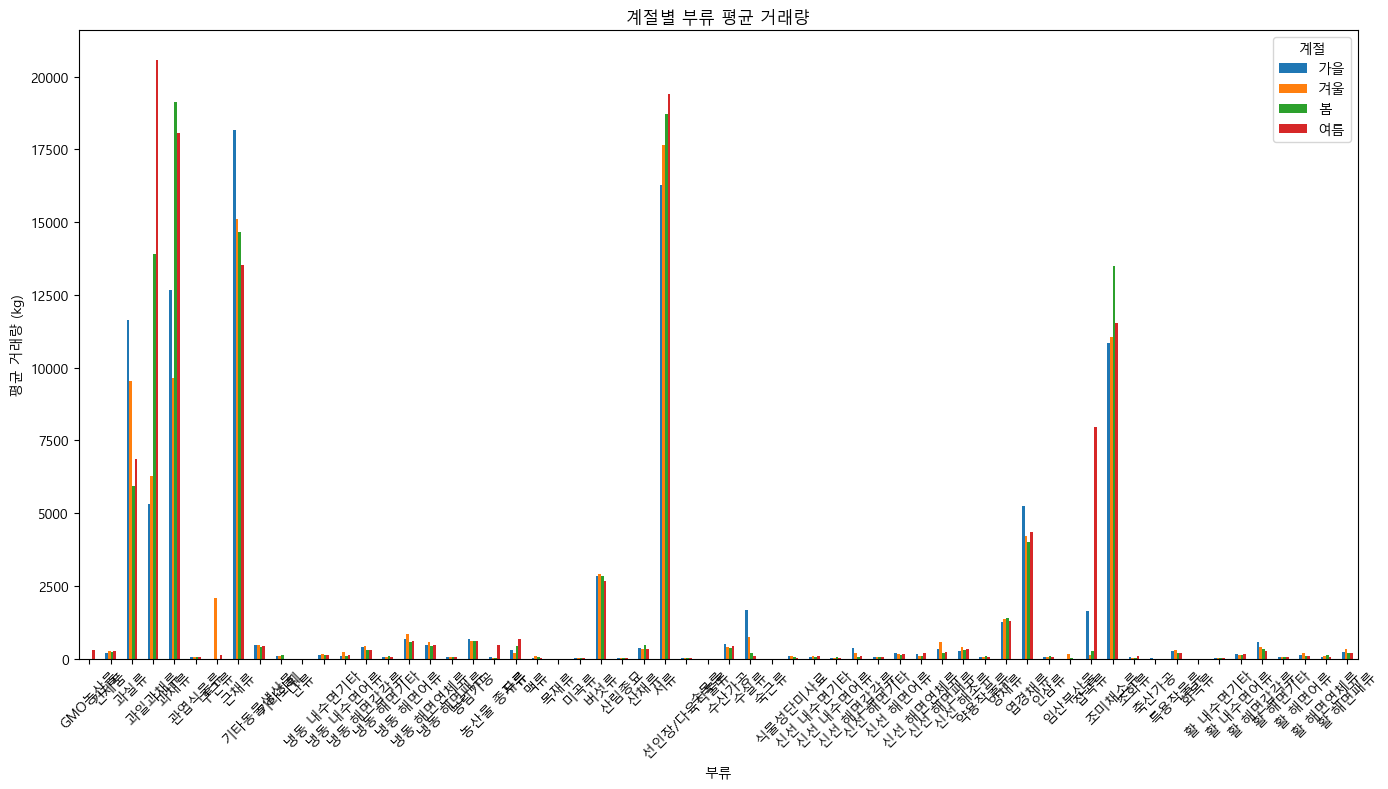

In [39]:
# 계절별 부류 평균 거래량 및 단가 분석

# 계절별 부류 평균 계산
seasonal_group_data = df.groupby(['계절', '부류'])[['총물량(kg)', '평균단가(원/kg)']].mean()

# 피벗 테이블로 변환 (시각화를 위해)
seasonal_group_pivot = seasonal_group_data.unstack(level=0)  # 계절 기준으로 펼침

# 계절별 부류 평균 거래량 시각화
seasonal_group_pivot['총물량(kg)'].plot(kind='bar', figsize=(14, 8), title='계절별 부류 평균 거래량')
plt.ylabel('평균 거래량 (kg)')
plt.xlabel('부류')
plt.xticks(rotation=45)
plt.legend(title='계절')
plt.tight_layout()
plt.show()


In [41]:
# 부류 컬럼의 고유값 확인
unique_groups = df['부류'].unique()
print("부류 컬럼의 고유값:\n", unique_groups)

# 부류별 데이터 개수 확인
group_counts = df['부류'].value_counts()
print("\n부류별 데이터 개수:\n", group_counts)

부류 컬럼의 고유값:
 ['과실류' '과일과채류' '과채류' '근채류' '농림가공' '버섯류' '산채류' '서류' '수산가공' '수실류' '신선 해조류'
 '약용작물류' '양채류' '엽경채류' '조미채소류' '두류' '잡곡류' '인삼류' '초화류' '특용작물류' '기타화훼' '맥류'
 '건제품' '기타동물생산물' '선인장/다육식물류' '관엽식물류' '목재류' '숙근류' '임산부산물' '산림종묘' '식물성단미사료'
 '활 해면어류' '농산물 종자류' '신선 해면기타' '신선 해면어류' '신선 해면패류' '활 해면갑각류' '활 해면연체류'
 '활 해면패류' '냉동 내수면기타' '냉동 해면어류' '신선 해면갑각류' '신선 해면연체류' '활 내수면기타' '활 내수면어류'
 '활 해면기타' '구근류' 'GMO농산물' '미곡류' '난류' '냉동 해면갑각류' '냉동 해면연체류' '냉동 해면패류'
 '신선 내수면기타' '냉동 해면기타' '신선 내수면어류' '냉동 내수면어류' '축산가공' '화목류' '수목류']

부류별 데이터 개수:
 부류
엽경채류         1382937
과실류           804524
양채류           758622
조미채소류         507417
산채류           375145
버섯류           325698
과일과채류         276276
근채류           234882
과채류           175455
신선 해조류        112879
서류            112111
농림가공           81054
두류             73646
약용작물류          53529
수실류            47274
특용작물류          43563
신선 해면어류        42938
활 해면어류         26674
활 해면패류         23769
냉동 해면어류        22368
잡곡류            22184
신선 해면패류        19846
건제품          

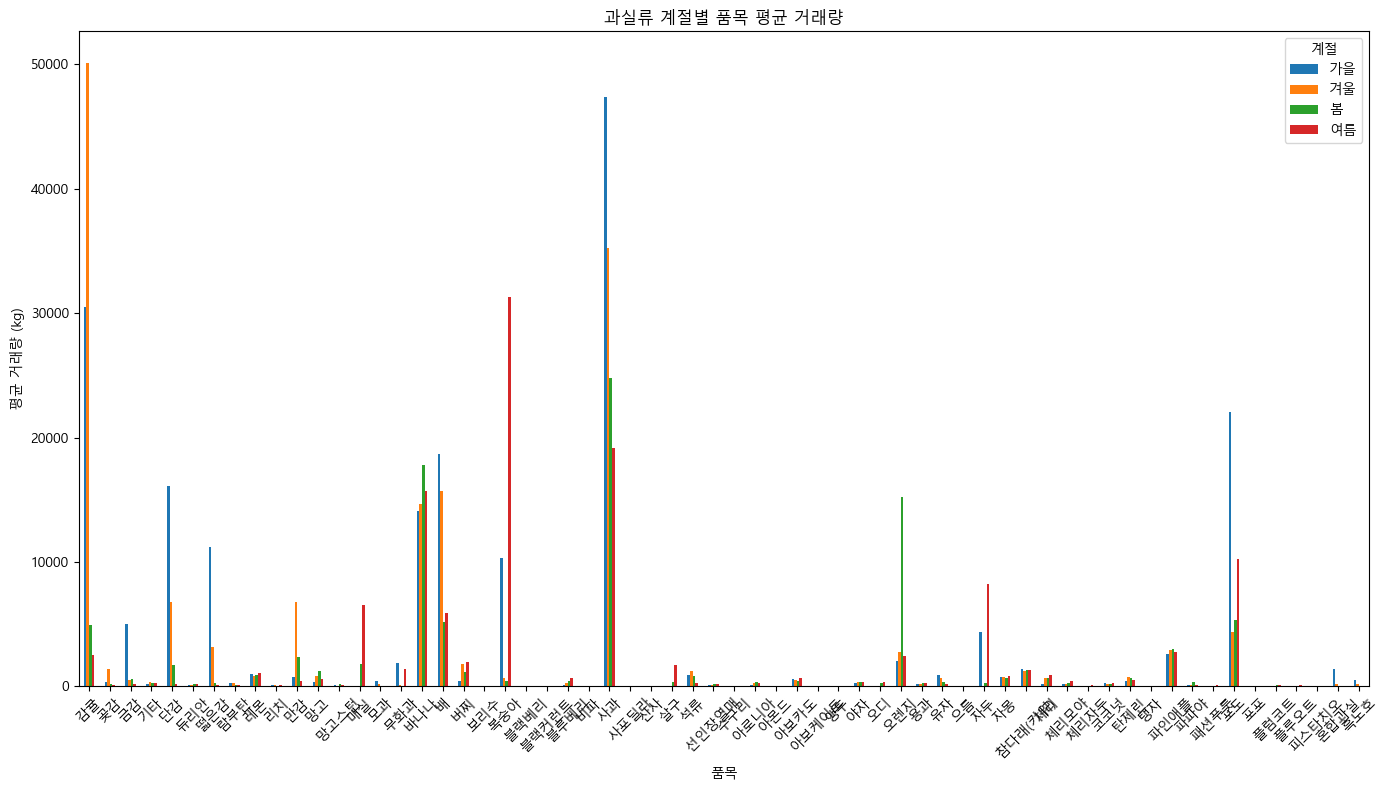

In [42]:
# 특정 부류 계절별 평균 거래량 및 단가

# 관심 부류 선택
target_group = '과실류'

# 특정 부류의 계절별 평균 거래량 및 단가 계산
seasonal_data = df[df['부류'] == target_group].groupby(['계절', '품목'])[['총물량(kg)', '평균단가(원/kg)']].mean()

# 특정 부류의 계절별 품목 거래량 시각화
seasonal_data['총물량(kg)'].unstack(level=0).plot(kind='bar', figsize=(14, 8), title=f'{target_group} 계절별 품목 평균 거래량')
plt.ylabel('평균 거래량 (kg)')
plt.xlabel('품목')
plt.xticks(rotation=45)
plt.legend(title='계절')
plt.tight_layout()
plt.show()


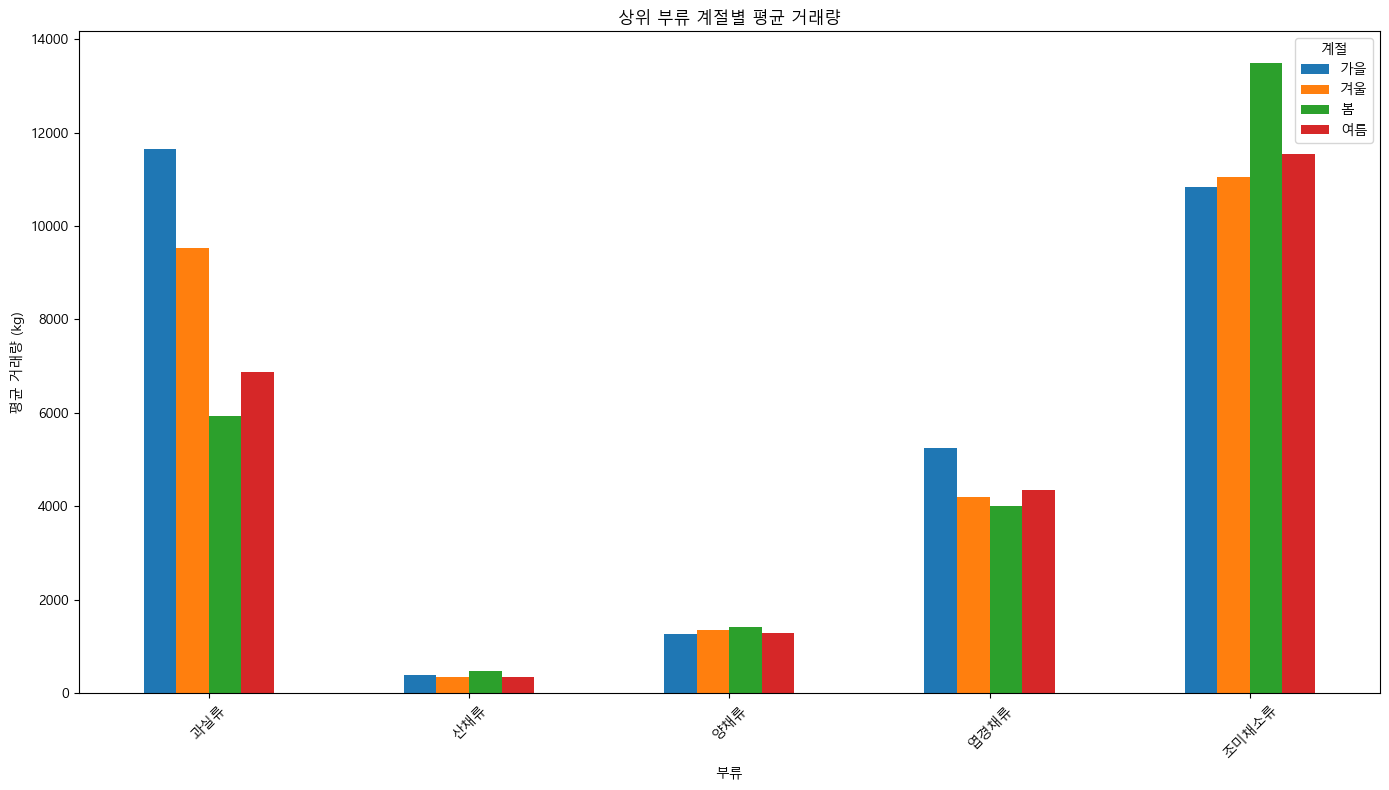

In [43]:
# 상위 부류별 계절별 평균 거래량

# 상위 부류 선택
top_groups = df['부류'].value_counts().head(5).index

# 상위 부류의 계절별 평균 거래량 계산
seasonal_group_data = df[df['부류'].isin(top_groups)].groupby(['계절', '부류'])[['총물량(kg)']].mean()

# 시각화
seasonal_group_data.unstack(level=0)['총물량(kg)'].plot(kind='bar', figsize=(14, 8), title='상위 부류 계절별 평균 거래량')
plt.ylabel('평균 거래량 (kg)')
plt.xlabel('부류')
plt.xticks(rotation=45)
plt.legend(title='계절')
plt.tight_layout()
plt.show()


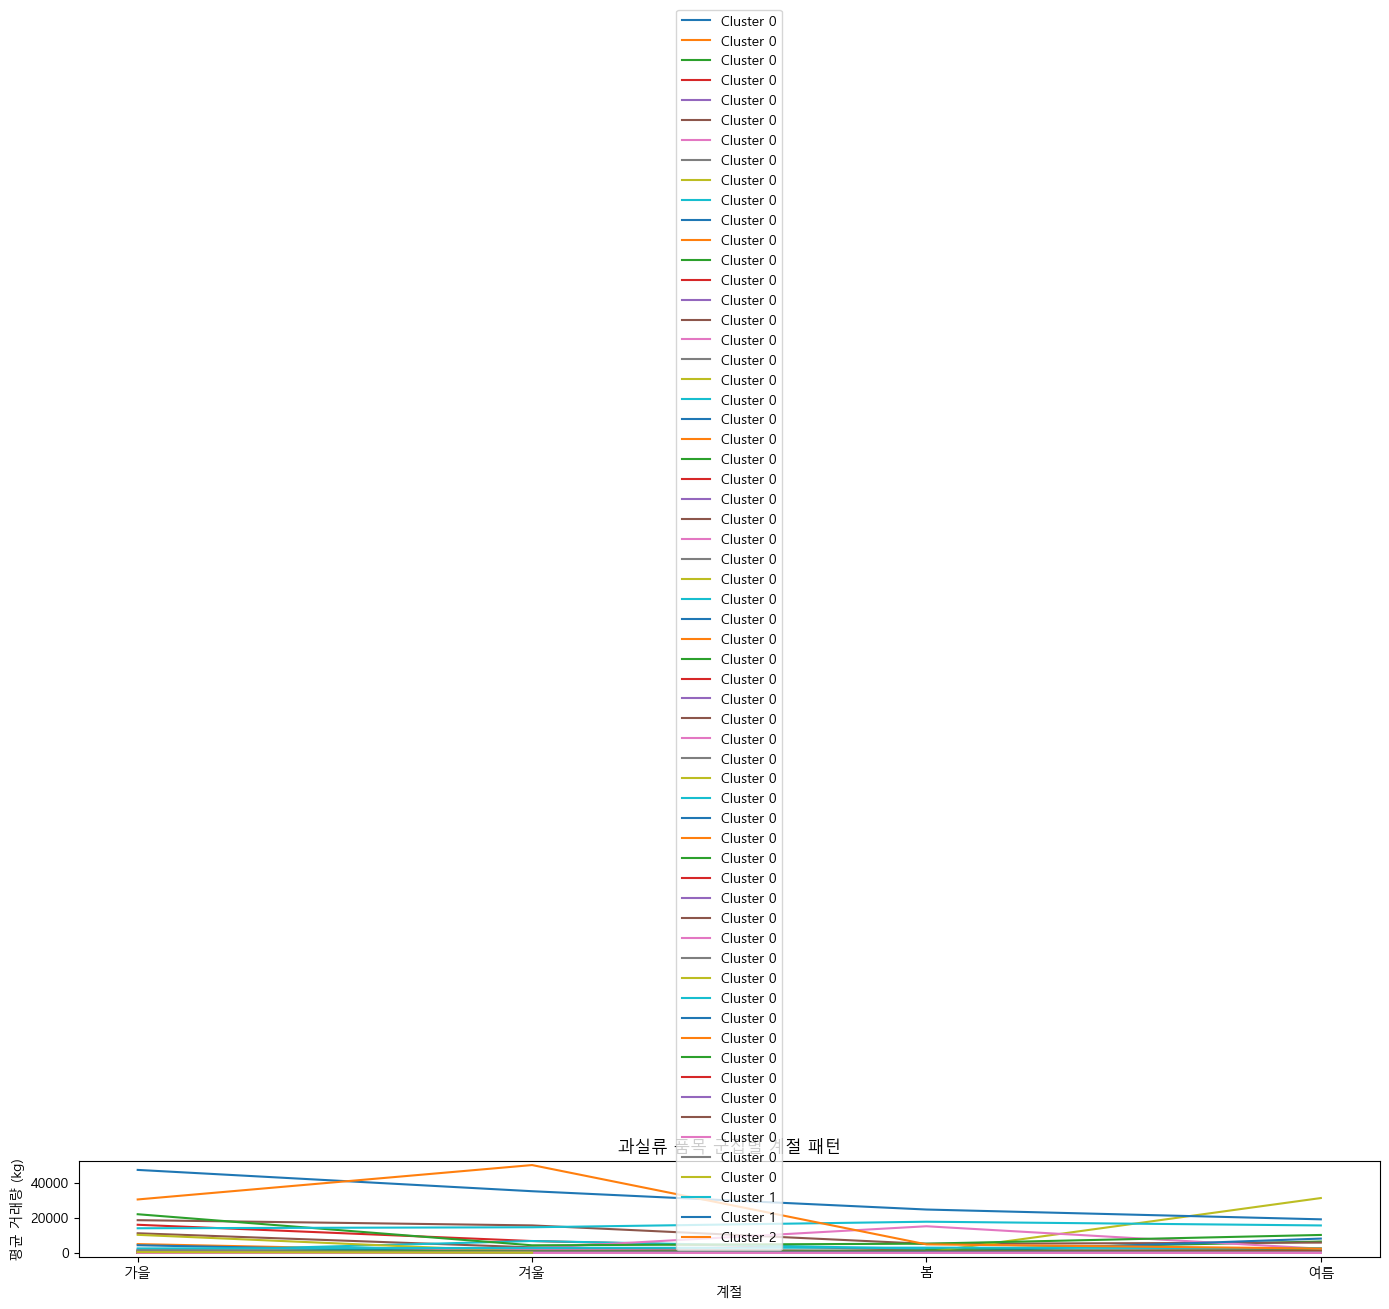

In [45]:
# 부류 내 품목 간 군집 분석

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 관심 부류 선택
target_group = '과실류'

# 부류 내 품목의 계절별 거래량 데이터
group_data = df[df['부류'] == target_group].groupby(['계절', '품목'])['총물량(kg)'].mean().unstack(level=0)

# 데이터 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(group_data.fillna(0))

# K-Means 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# 군집 결과 데이터프레임
group_data['Cluster'] = clusters

# 결과 시각화
plt.figure(figsize=(14, 8))
for cluster in range(3):
    cluster_data = group_data[group_data['Cluster'] == cluster].drop(columns='Cluster')
    plt.plot(cluster_data.T, label=f'Cluster {cluster}')

plt.title(f'{target_group} 품목 군집별 계절 패턴')
plt.ylabel('평균 거래량 (kg)')
plt.xlabel('계절')
plt.legend()
plt.tight_layout()
plt.show()


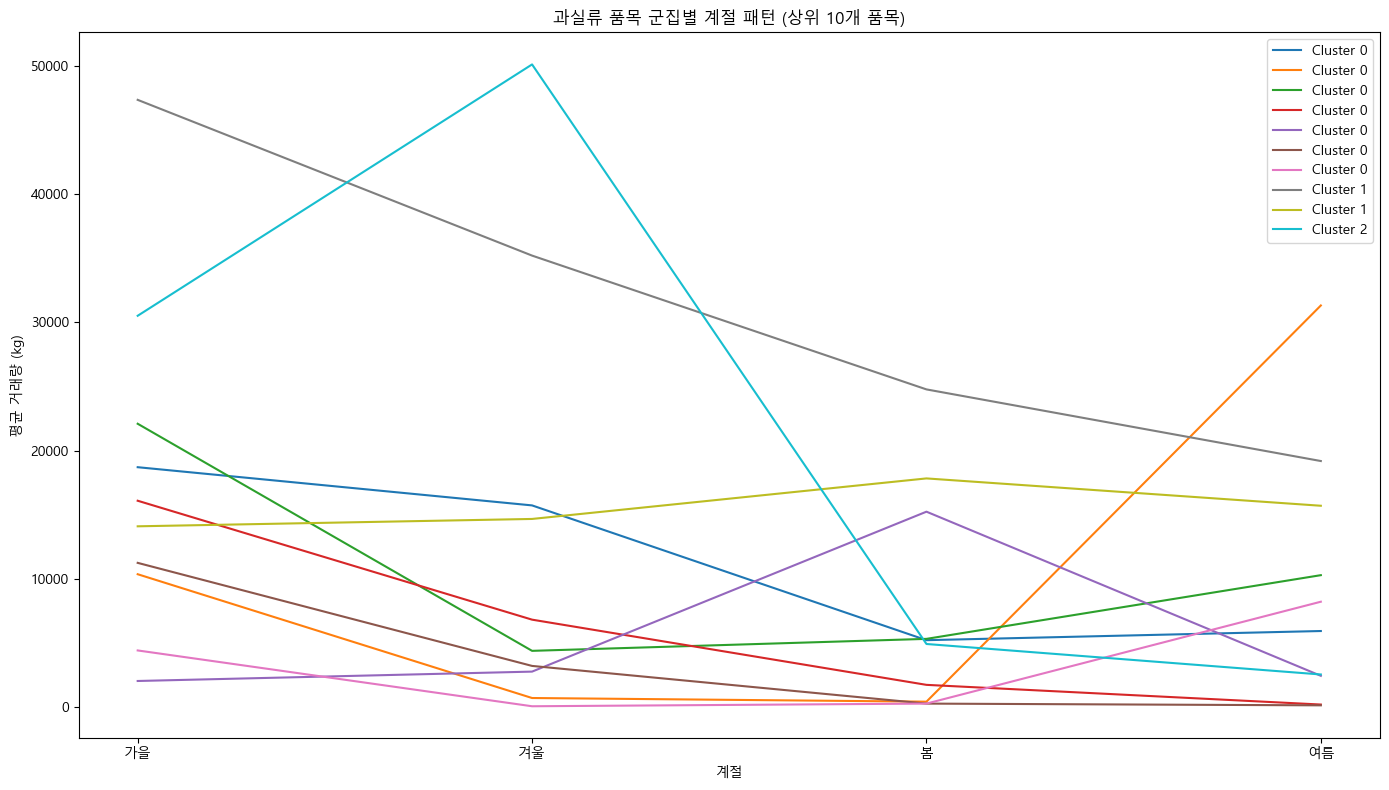

In [46]:
# 상위 거래량 품목 선택
top_items = group_data.sum(axis=1).sort_values(ascending=False).head(10).index

# 상위 품목만 필터링
filtered_data = group_data.loc[top_items]

# 클러스터링 결과 재시각화
plt.figure(figsize=(14, 8))
for cluster in range(3):
    cluster_data = filtered_data[filtered_data['Cluster'] == cluster].drop(columns='Cluster')
    plt.plot(cluster_data.T, label=f'Cluster {cluster}')

plt.title(f'{target_group} 품목 군집별 계절 패턴 (상위 10개 품목)')
plt.ylabel('평균 거래량 (kg)')
plt.xlabel('계절')
plt.legend()
plt.tight_layout()
plt.show()


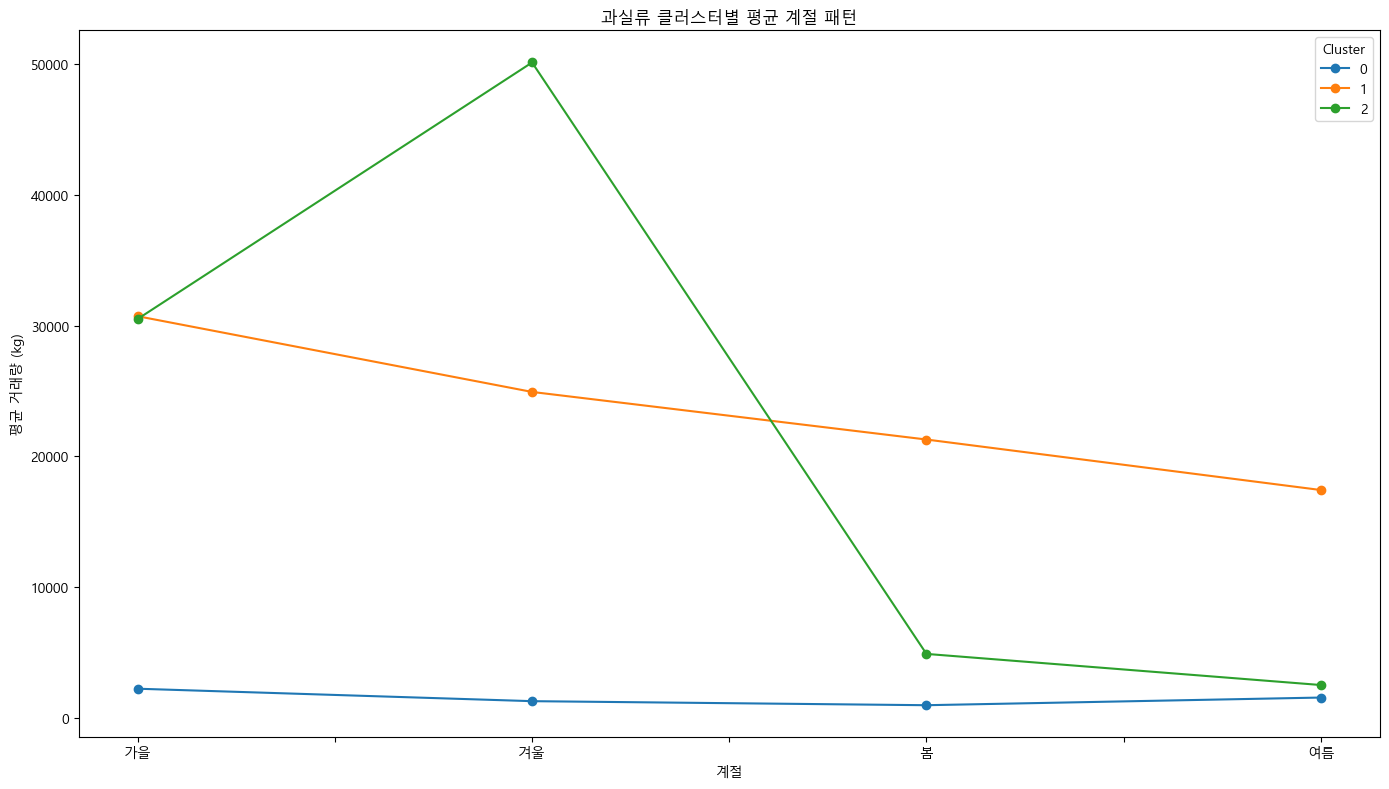

In [47]:
# 클러스터별 평균 계절 패턴 계산
cluster_averages = group_data.groupby('Cluster').mean()

# 평균 패턴 시각화
cluster_averages.T.plot(kind='line', figsize=(14, 8), marker='o')
plt.title(f'{target_group} 클러스터별 평균 계절 패턴')
plt.ylabel('평균 거래량 (kg)')
plt.xlabel('계절')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


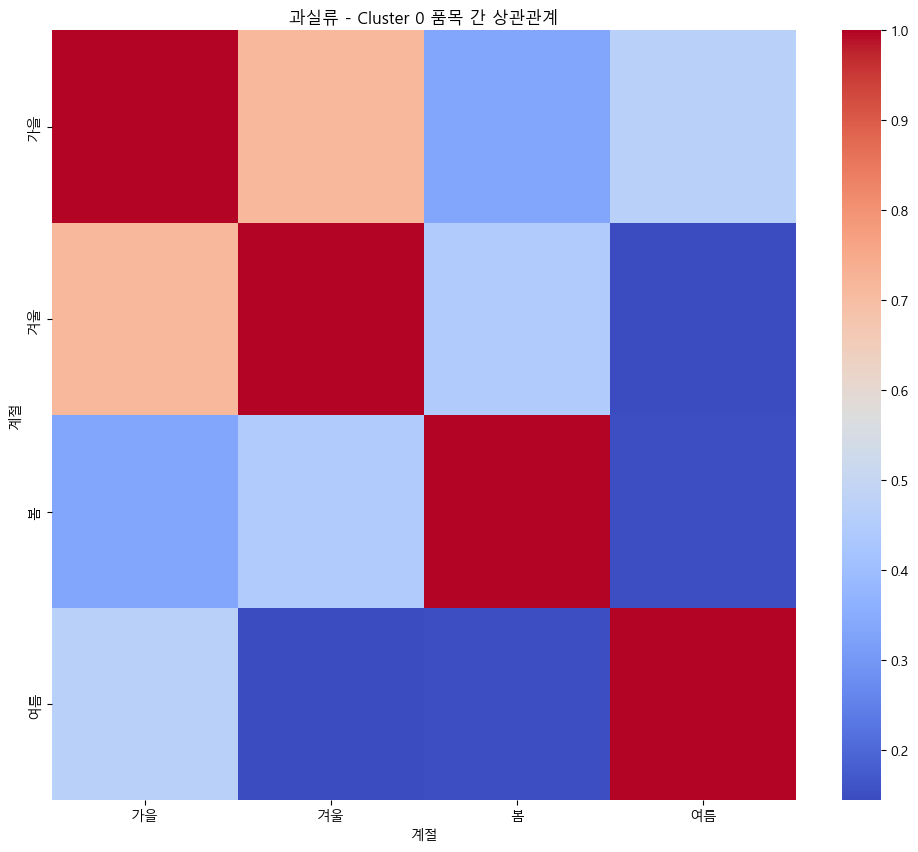

In [ ]:
# 특정 클러스터의 데이터
correlation_data = group_data[group_data['Cluster'] == selected_cluster].drop(columns='Cluster')

# 상관관계 히트맵
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_data.corr(), annot=False, cmap='coolwarm', cbar=True)
plt.title(f'{target_group} - Cluster {selected_cluster} 품목 간 상관관계')
plt.show()

